# DATA 690 FINAL PROJECT

In [ ]:
os.chdir('Colab Notebooks')

In [ ]:
os.listdir(os.getcwd())

['Untitled0.ipynb',
 'DATA690 HW1.ipynb',
 'DATA606 HW1 Submission.ipynb',
 'DATA 690 HW2.ipynb',
 'DATA690 HW1 v2.ipynb',
 'DATA690 HW1 v3.ipynb',
 'Help DATA 690 HW2.ipynb',
 'DATA 690 HW4.ipynb',
 'Copy of DATA 690 HW2.ipynb',
 'DATA 690',
 'third-place-model-for-toxic-comments-in-pytorch.ipynb',
 'DATA 690 Pratical Deep Learning Project.ipynb']

In [ ]:
os.chdir('DATA 690')

In [ ]:
os.listdir(os.getcwd())

['Lecture 1 Pytorch Mechanics.ipynb',
 'Untitled',
 'Lecture 4 Recurrent Neural Networks (1) (1).ipynb',
 'Lecture 4 Recurrent Neural Networks (1).ipynb',
 'Lecture 4 Recurrent Neural Networks.ipynb',
 'Lecture 13 Advanced Building Blocks.ipynb',
 'Lecture 1 Pytorch Mechanics (1).ipynb',
 'Lecture 10 Attention Mechanisms.ipynb',
 'Lecture 11 Network Design Alternatives to RNNs.ipynb',
 'Lecture 12 Transfer Learning.ipynb',
 'Lecture 7 Auto Encoding and Self Supervision.ipynb',
 'Lecture 6 Common Design Building-Blocks.ipynb',
 'Lecture 3 Convolutional Neural Network.ipynb',
 'Lecture 9 Generative Adversarial Networks .ipynb',
 'Lecture 8 Object Detection.ipynb',
 'Lecture 2 Fully Connected Networks.ipynb',
 'Lecture 5 Modern Training Techniques.ipynb',
 'creditcard.csv',
 'credit_card_model.pth']

# DATA EXPLORATION

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df.shape)


(284807, 31)


In [ ]:
print(df.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

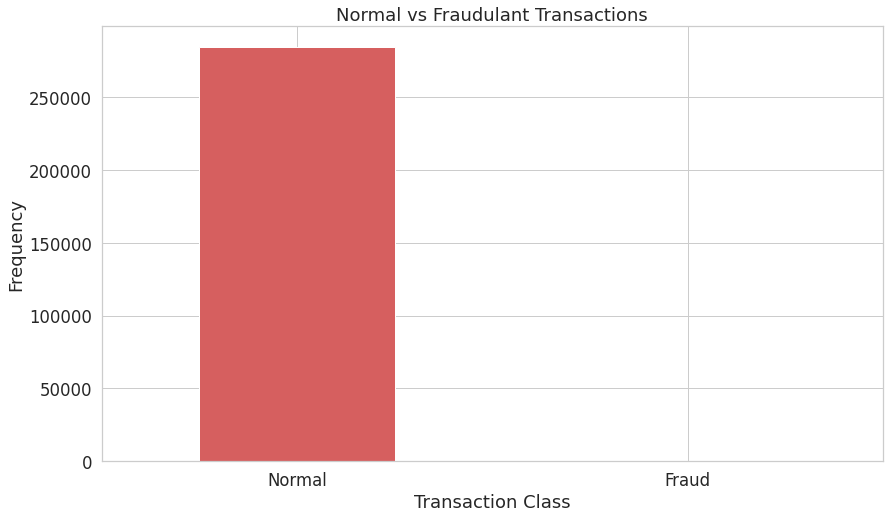

In [ ]:
count_classes = pd.value_counts(df.Class,sort=True)
count_classes.plot(kind='bar',rot=0, color="r")
plt.title("Normal vs Fraudulant Transactions")
plt.xticks(range(2), LABELS)
plt.xlabel("Transaction Class")
plt.ylabel("Frequency");

In [ ]:
Fdf = df[df.Class == 1 ]
Ndf = df[df.Class == 0 ]
print(Fdf.shape)
print(Ndf.shape)

(492, 31)
(284315, 31)


In [ ]:
print(Fdf.Amount.describe())
print("")
print(Ndf.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


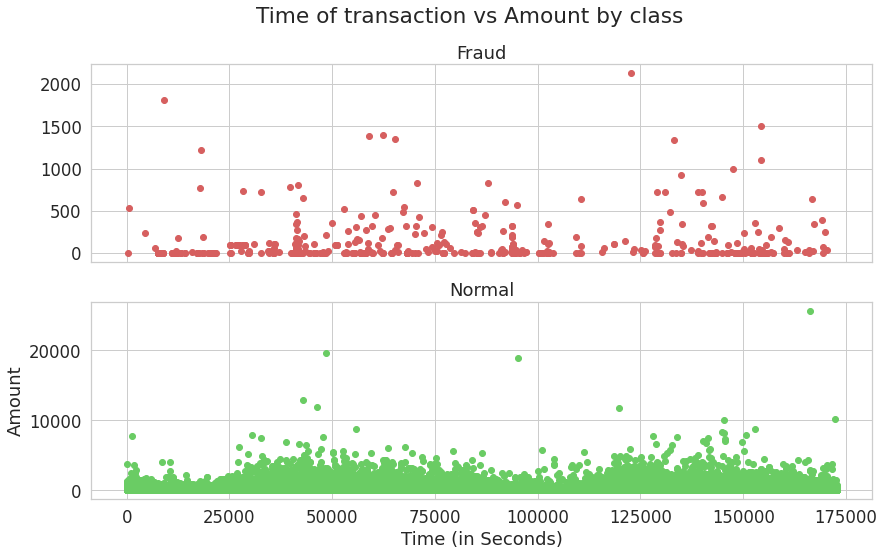

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(Fdf.Time, Fdf.Amount, color="r")
ax1.set_title('Fraud')

ax2.scatter(Ndf.Time, Ndf.Amount, color='g')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
transactions = df.drop(['Time'],axis = 1)

In [ ]:
transactions.Amount = StandardScaler().fit_transform(
transactions.Amount.values.reshape(-1,1)
)

In [ ]:
X_train, X_test = train_test_split(transactions, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
print(type(X_train))
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
print(type(X_train))
X_test = X_test.values
y_test = y_test.values
print(y_test.size)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
56962


Here we set up our Autoencoding model.

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(29,14),
            nn.Tanh(),
            nn.Linear(14,14),
            nn.Tanh(),
            nn.Linear(14,7),
            nn.LeakyReLU()
            )
        self.decoder = nn.Sequential(
            nn.Linear(7, 10),
            nn.Tanh(),
            nn.Linear(10,10),
            nn.Tanh(),
            nn.Linear(10, 29),
            nn.LeakyReLU()
            )
    def forward(self , x):
        x = self.encoder(x)
        x = self.decoder(x)
        return(x)

In [ ]:
model = Autoencoder().double().cpu()

In [ ]:
#Hyperparameters
num_epochs = 150
batch_size = 32
lr = 0.0001

In [ ]:
train_loader = data_utils.DataLoader(X_train,batch_size=batch_size,shuffle=True)
test_loader = data_utils.DataLoader(X_test, batch_size=1, shuffle=False)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
model.parameters(), lr=lr, weight_decay=10e-05)

In [ ]:
history = {}
history['train_loss'] = []
history['test_loss'] = []

I then proceed with training.

In [ ]:
for epoch in range(num_epochs):
    h = np.array([])
    for data in train_loader:
        #print(type(data))
        #data = Variable(data).cpu()
        #print(type(data))
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        h = np.append(h, loss.item())
        
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    mean_loss = np.mean(h)
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, mean_loss))
    history['train_loss'].append(mean_loss)
    

torch.save(model.state_dict(), './credit_card_model.pth')

epoch [1/150], loss:0.9595
epoch [2/150], loss:0.8518
epoch [3/150], loss:0.8228
epoch [4/150], loss:0.8051
epoch [5/150], loss:0.7912
epoch [6/150], loss:0.7814
epoch [7/150], loss:0.7723
epoch [8/150], loss:0.7655
epoch [9/150], loss:0.7602
epoch [10/150], loss:0.7554
epoch [11/150], loss:0.7485
epoch [12/150], loss:0.7412
epoch [13/150], loss:0.7354
epoch [14/150], loss:0.7314
epoch [15/150], loss:0.7286
epoch [16/150], loss:0.7263
epoch [17/150], loss:0.7242
epoch [18/150], loss:0.7225
epoch [19/150], loss:0.7209
epoch [20/150], loss:0.7196
epoch [21/150], loss:0.7182
epoch [22/150], loss:0.7169
epoch [23/150], loss:0.7156
epoch [24/150], loss:0.7144
epoch [25/150], loss:0.7134
epoch [26/150], loss:0.7123
epoch [27/150], loss:0.7114
epoch [28/150], loss:0.7105
epoch [29/150], loss:0.7097
epoch [30/150], loss:0.7089
epoch [31/150], loss:0.7082
epoch [32/150], loss:0.7076
epoch [33/150], loss:0.7070
epoch [34/150], loss:0.7064
epoch [35/150], loss:0.7059
epoch [36/150], loss:0.7053
e

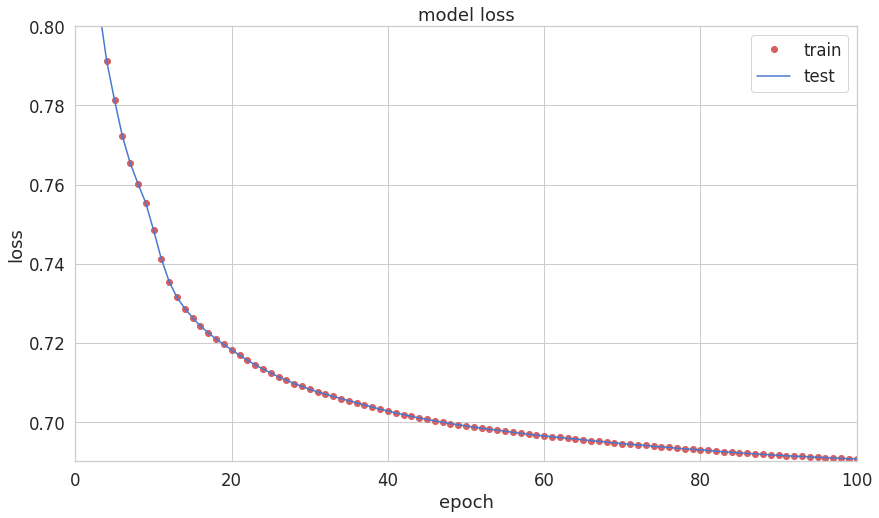

In [ ]:
plt.plot(range(num_epochs),history['train_loss'],'ro',linewidth=2.0)
plt.plot(history['train_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.axis([0,100,0.69,0.80])
plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [ ]:
pred_losses = { 'pred_loss' : []}
model.eval()
with torch.no_grad():
    for data in test_loader:
        inputs = data
        outputs = model(inputs)
        loss = criterion(outputs, inputs).data.item()
        pred_losses['pred_loss'].append(loss)
reconstructionErrorDF = pd.DataFrame(pred_losses)
reconstructionErrorDF['Class'] = y_test

In [ ]:
reconstructionErrorDF.head(5)

,pred_loss,Class
0,80.064241,1
1,0.835186,0
2,0.269226,0
3,0.392761,0
4,0.159271,0


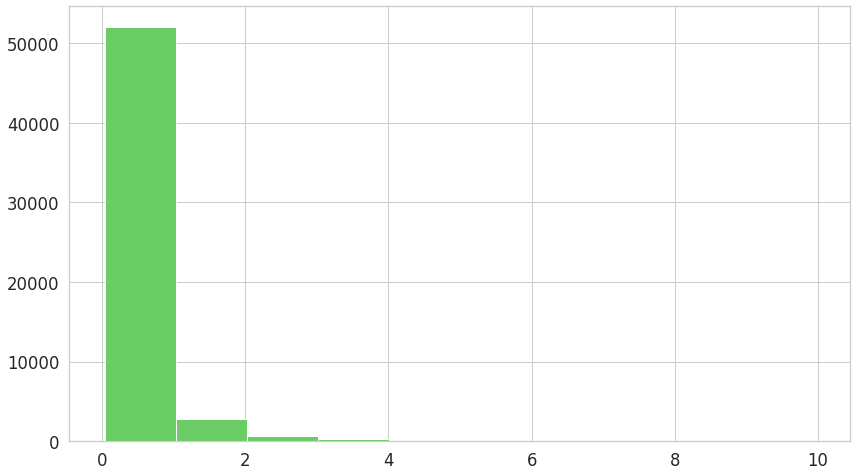

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = reconstructionErrorDF[(reconstructionErrorDF['Class']== 0) & (reconstructionErrorDF['pred_loss'] < 10)]
_ = ax.hist(normal_error_df.pred_loss.values, bins=10,color='g')

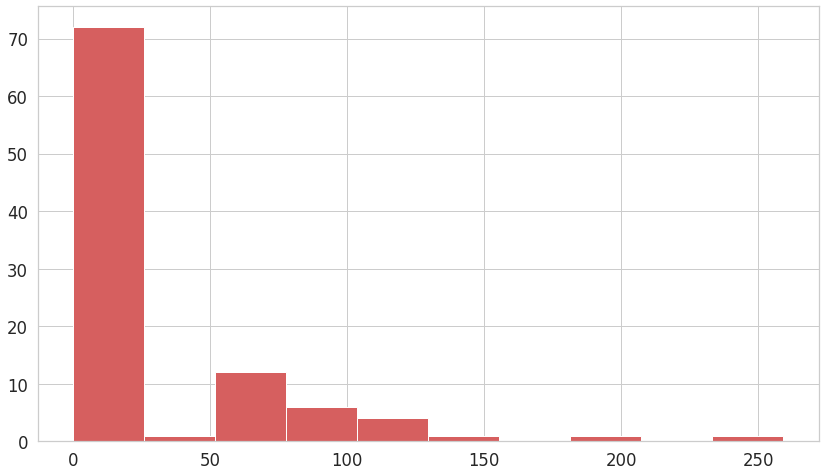

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = reconstructionErrorDF[(reconstructionErrorDF['Class']== 1)]
_ = ax.hist(fraud_error_df.pred_loss.values, bins=10,color='r')

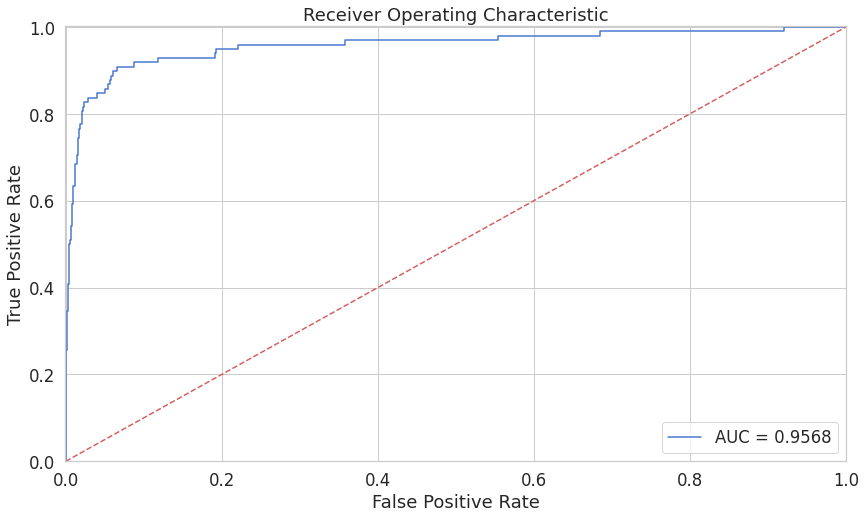

In [ ]:
fpr, tpr, thresholds = roc_curve(reconstructionErrorDF.Class, reconstructionErrorDF.pred_loss)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [ ]:
precision, recall, th = precision_recall_curve(
    reconstructionErrorDF.Class, 
    reconstructionErrorDF.pred_loss)

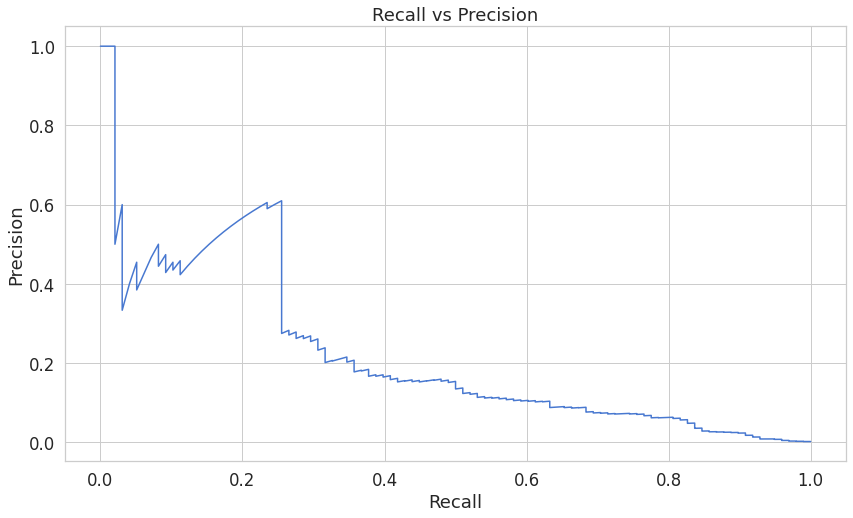

In [ ]:
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

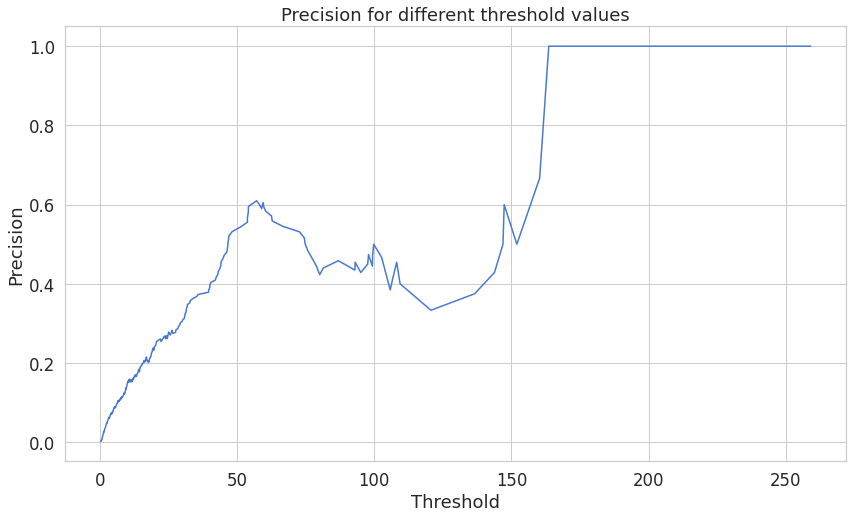

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

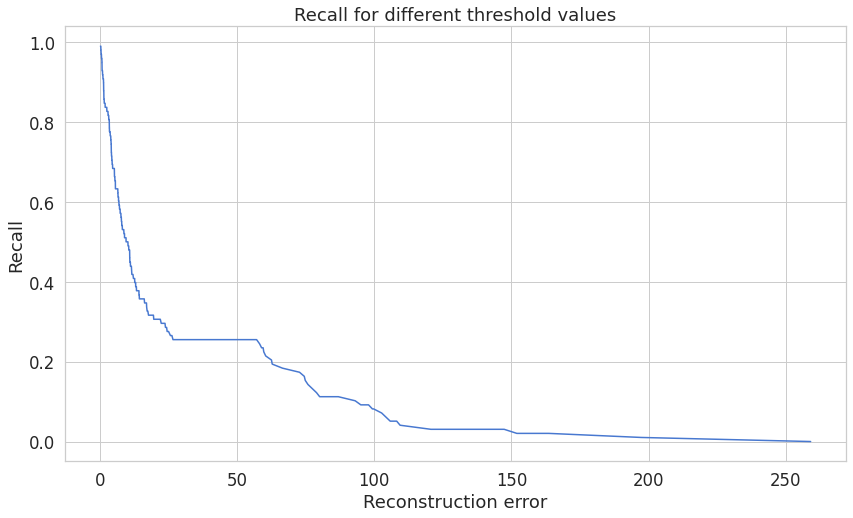

In [ ]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

Here we use this trained model to then predict future transactions.

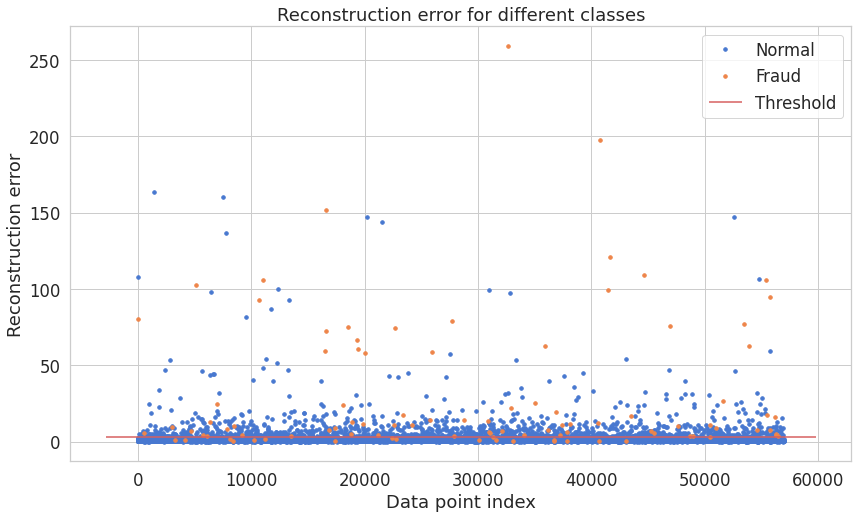

In [ ]:
threshold = 3

groups = reconstructionErrorDF.groupby('Class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.pred_loss, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

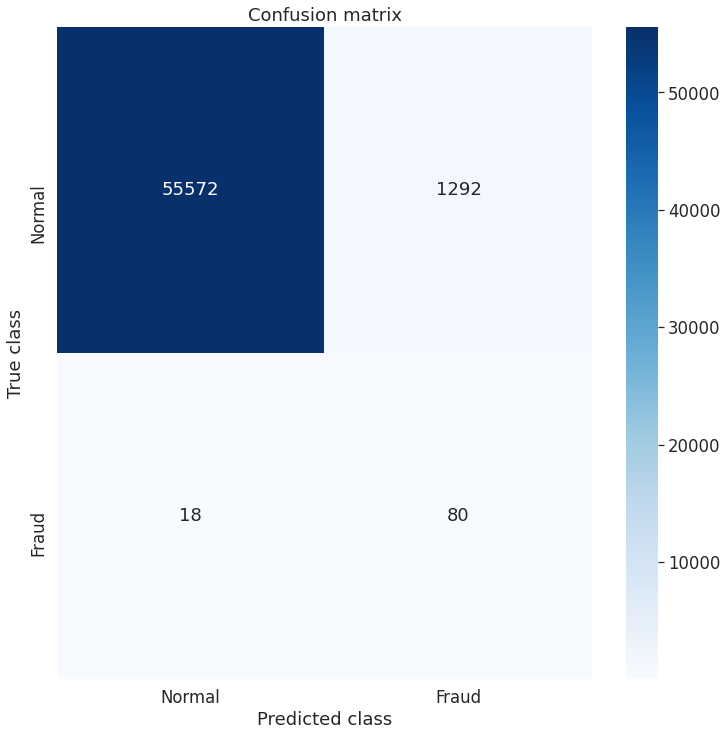

In [ ]:
y_pred = [1 if e > threshold else 0 for e in reconstructionErrorDF.pred_loss.values]

conf_matrix = confusion_matrix(reconstructionErrorDF.Class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", 
            cmap=plt.cm.get_cmap('Blues'));
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()